In [75]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import statsmodels.api as sm # recommended import according to the docs

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')

from __future__ import division
import math
from math import pi

In [76]:
# ipath= "C:\Users\Administrator\Desktop\科研风速数据资料\美国时刻风速数据\上海\虹桥\\9705626661750dat.txt"
# For Shanghai
# df.drop(['NCDC', 'Date','I', 'Type', 'Q', 'Q.1'], 1, inplace=True)
# df.rename(columns={'HrMn':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)

# ipath = './boscombe_down/3466726903106dat.txt'
ipath = './ciampino/6240476818161dat.txt'
# ipath = 'tiree.txt'
# ipath= "marham.txt"
uipath = unicode(ipath , "utf8")
file2 = open(uipath)
df = pd.read_csv(uipath,header=0, skipinitialspace=True)
df.drop(['USAF', 'NCDC', 'I','Type' ,'QCP','Q','Q.1','I.1','Unnamed: 12'], 1,inplace=True)
df.rename(columns={'Date':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)
df.describe()

,date,HrMn,dir,speed
count,511302.000000,511302.000000,511302.000000,511302.000000
mean,19966005.438352,1158.515552,236.408219,4.728720
std,150314.007385,683.360521,188.224879,5.189054
min,19310101.000000,0.000000,10.000000,0.000000
25%,19861014.000000,600.000000,140.000000,2.600000
50%,20001005.000000,1150.000000,220.000000,4.600000
75%,20081130.000000,1750.000000,290.000000,6.200000
max,20151201.000000,2350.000000,999.000000,999.900000


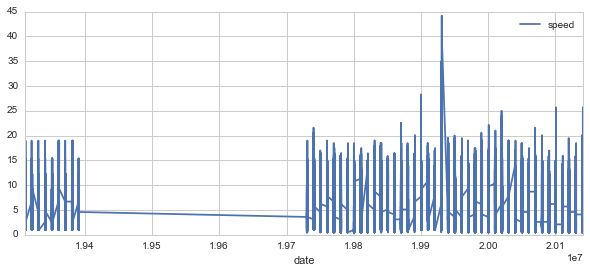

In [77]:
# select year 1945-2014, dir < 999, speed<999
df = df[(df['dir'] < 999) & (df['speed'] < 999)& (df['date'] < 20150000) ]
df.rename(columns={'speed':'speed_mps'}, inplace=True)
df['speed']=df['speed_mps']
df.index= df['date']
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

In [78]:
# Data Selection
# Marham, date >1973
# Ciampino, date： 1973~2014
if "ciampino" not in ipath: 
    df = df[ (df['date'] > 19730000) & (df['date'] < 20150000)]
    df = df[df['HrMn'] % 100 <= 0.1]
else: 
    # For Roma Ciampino
    df = df[ (df['date'] > 19720000) & (df['date'] < 20150000)]
    df = df[(df['HrMn'] % 100 == 15)|(df['HrMn'] % 100 == 45)|(df['HrMn'] % 100 == 20)|(df['HrMn'] % 100 == 50)]

In [79]:
# Using speed unit in knot instead of m/s
df['speed']=df['speed_mps']*1.943845
# need more elaboration, some is not near an integer
df['speed'] =  df['speed'].apply(lambda x: int(round(x)))

In [80]:
df.describe()

,date,HrMn,dir,speed_mps,speed
count,325110.000000,325110.000000,325110.000000,325110.000000,325110.000000
mean,19937773.617160,1158.501738,200.918212,4.956314,9.639411
std,124811.379859,685.225436,95.445194,2.628254,5.107431
min,19730101.000000,0.000000,10.000000,0.500000,1.000000
25%,19830103.000000,600.000000,130.000000,3.100000,6.000000
50%,19941104.000000,1200.000000,210.000000,4.600000,9.000000
75%,20050426.000000,1700.000000,280.000000,6.700000,13.000000
max,20141231.000000,2300.000000,360.000000,44.200000,86.000000


              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19931009  19931009  1800  240       44.2     86     76             77
19931229  19931229  1800   30       39.6     77     66             68
19930509  19930509     0  240       35.0     68     55             53
20141216  20141216  1100  110       25.7     50     47             44
20101111  20101111   700  120       25.7     50     27             25
19900125  19900125  1200  220       25.7     50      7              6
20020128  20020128  1400  250       25.0     49      6             34
20020313  20020313  1700   70       24.0     47     24             26
19900125  19900125  1600  270       23.1     45      0             14
20020310  20020310  1700  210       23.0     45     17             32
19900125  19900125  1400  260       23.1     45      1              0
20020525  20020525  1500  210       23.0     45     21             24
19900125  19900125  

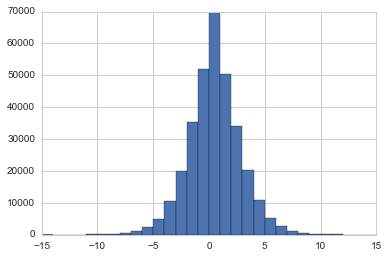

In [81]:
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0)
print df.sort('speed',ascending=False).head(20)
bins=np.arange(-15, 15 + 1, 1)
df['incre'].hist(bins=bins)

In [82]:
# Simple Artefacts Handling
df =  df[ (df['incre'] < 20)&(df['incre_reverse'] < 20)]
df = df[df['dir'] % 10 <= 0.1]
df = df[df['speed'] >= 0.1 ]

## After Simple Aretefacts Hnadling

In [83]:
# Check the max speed
print df.sort('speed',ascending=False).head(20)

              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19900125  19900125  1200  220       25.7     50      7              6
19900125  19900125  1600  270       23.1     45      0             14
19900125  19900125  1400  260       23.1     45      1              0
19870327  19870327   900  220       22.6     44      2              2
19900125  19900125  1300  230       22.6     44     -6             -1
19930113  19930113  1500  210       22.6     44      4              8
19900125  19900125  1100  230       22.1     43      8             -7
19931209  19931209   200  270       22.1     43      2              5
20070118  20070118  1500  270       21.6     42     10              9
19870327  19870327  1000  210       21.6     42     -2              4
19740116  19740116  1400  220       21.6     42     12              3
19870327  19870327   800  200       21.6     42      6             -2
19931209  19931209  

1200    14145
1500    14141
1600    14093
1400    14085
1300    14083
1100    14061
1000    13954
1700    13871
900     13815
1800    13696
800     13598
1900    13551
2000    13468
2100    13365
700     13309
2300    13211
2200    13211
0       13197
100     13103
600     13085
300     13052
200     13049
500     12988
400     12953
dtype: int64


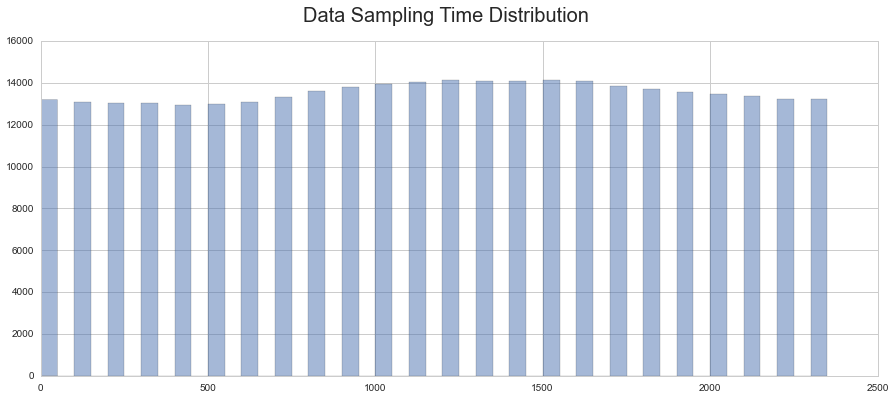

In [84]:
# Ensure data sampled equally
print df['HrMn'].value_counts()
bins=np.arange(min(df.HrMn), max(df.HrMn) + 100, 50)
df['HrMn'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
plt.suptitle('Data Sampling Time Distribution', fontsize = 20)

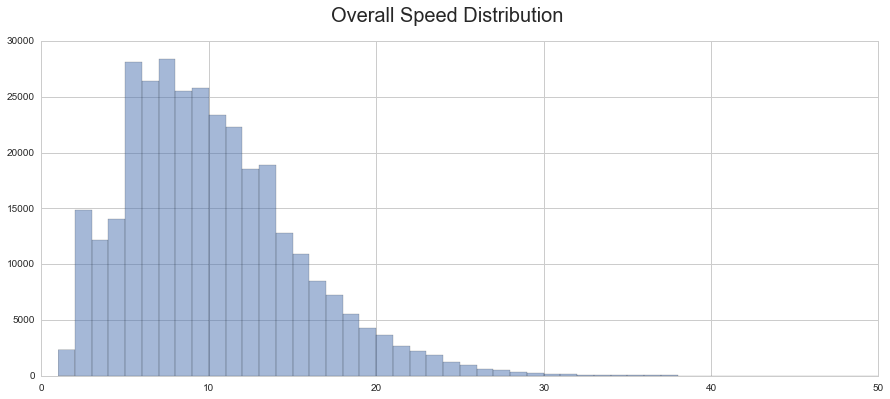

In [85]:
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
plt.suptitle('Overall Speed Distribution', fontsize = 20)

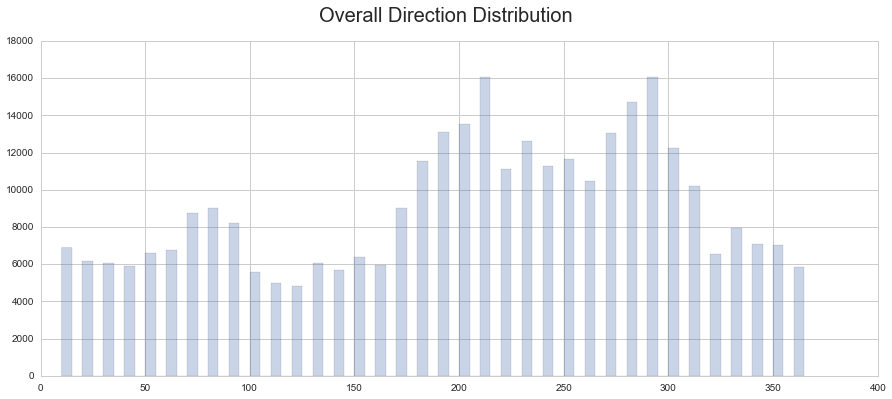

In [86]:
bins=np.arange(min(df.dir), max(df.dir) + 10, 5)
df['dir'].hist(bins=bins, alpha=0.3,figsize=(15, 6))
plt.suptitle('Overall Direction Distribution', fontsize = 20)

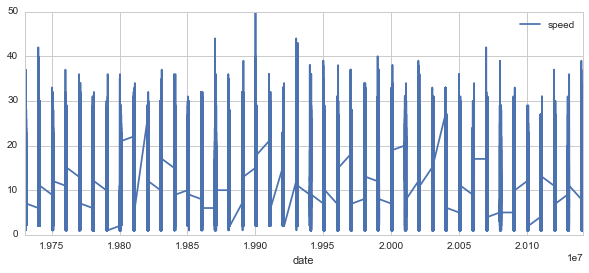

In [87]:
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

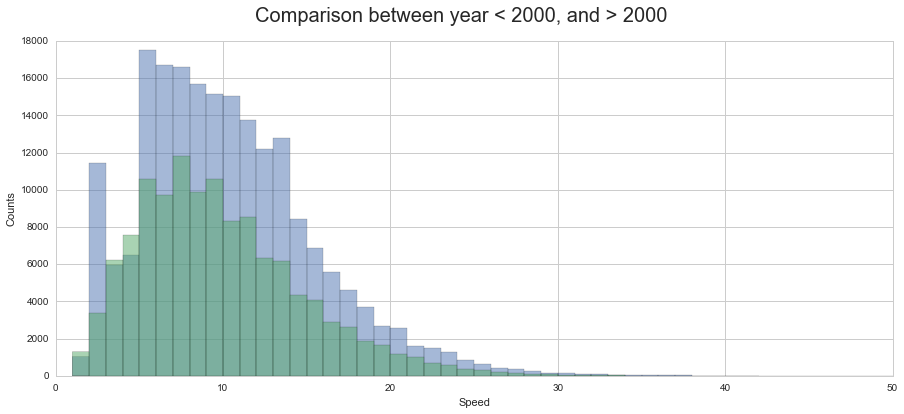

In [88]:
# Comparison between year < 2000, and > 2000, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
df_temp = df[df['date'] < 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins,alpha = 0.5,figsize=(15, 6))

df_temp = df[df['date'] > 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha = 0.5,figsize=(15, 6))

plt.xlabel("Speed")
plt.ylabel("Counts")
plt.suptitle('Comparison between year < 2000, and > 2000', fontsize = 20)

In [89]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19750000,20150000,50000):
        end_time = start_time + 50000 
        sub_df = df[ (df['date'] >= start_time) & (df['date'] < end_time)]
        fig = plt.figure()
        bins = np.arange(min(sub_df.speed), max(sub_df.speed) + 1, 1)
        sub_df['speed'].hist(bins=bins)
        fig.suptitle(start_time)

    for start_time in xrange(19750000,20150000,50000):
        end_time = start_time + 50000 
        sub_df = df[ (df['date'] >= start_time) & (df['date'] < end_time)]
        bins=np.arange(min(sub_df.dir), max(sub_df.dir) + 10, 5)
        fig = plt.figure()
        sub_df['dir'].hist(bins=bins, alpha=0.3,figsize=(15, 6))
        fig.suptitle(start_time)
    
# check_time_shift(df)

# Re-select time range after looking at data

In [90]:
if "ciampino" in ipath: 
    # For Ciampino
    df = df[ (df['date'] >= 20100000) & (df['date'] < 20150000)]
elif "marham" in ipath:
    # For Marham
    # speed still suffers from odd-even bias
    df = df[ (df['date'] >= 20100000) & (df['date'] < 20150000)]
else: 
    # For Tiree, non is stable
    df = df[ (df['date'] > 19720000) & (df['date'] < 20150000)]

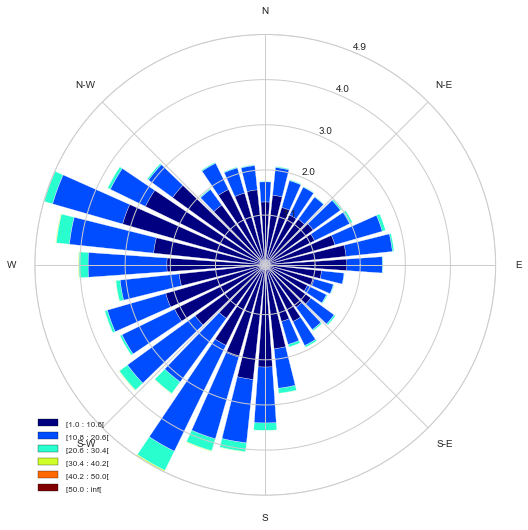

In [91]:
from windrose import WindroseAxes

df.dir_windrose = df.dir
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

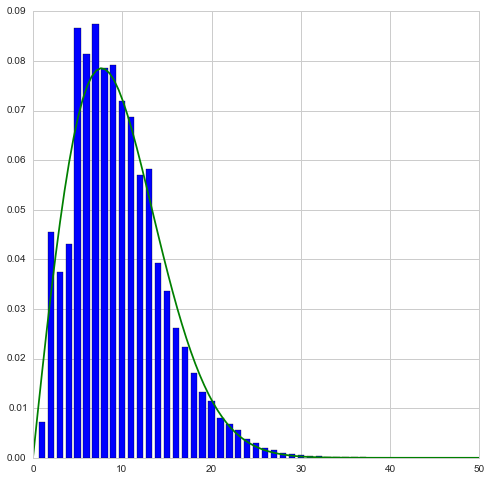

In [92]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
ax, params = ax.pdf(df.speed, bins = bins)

In [93]:
print params
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
print weibull_params

(1, 1.9923668218088744, 0, 10.893086195697132)
(1, 1.9923668218088744, 0, 10.893086195697132)


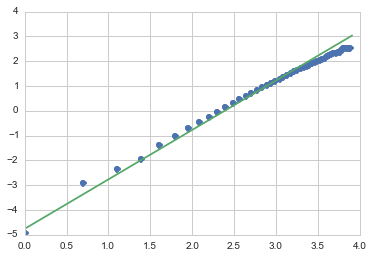

In [94]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')
plt.show()

In [95]:
# convert from windrose system to polar system
df['dir'] = 90-df.dir

df['dir'] = df['dir'].apply(lambda x: x + 360 if x < 0 else x)

In [96]:
# # Randomize angle
def randomize_angle(df):
    df['random_angle_incre'] = 0
    df['random_angle_incre'] = df['random_angle_incre'].apply(lambda x: np.random.uniform(-5,5))
    df['dir_ran']=df['dir']+df['random_angle_incre']
    bins=np.arange(min(df.dir_ran), max(df.dir_ran) + 1, 1)

    df['dir_ran']= df['dir_ran'].apply(lambda x: x + 360 if x < 0 else x)
    df['dir_ran']= df['dir_ran'].apply(lambda x: x - 360 if x > 360 else x)
    df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    return df

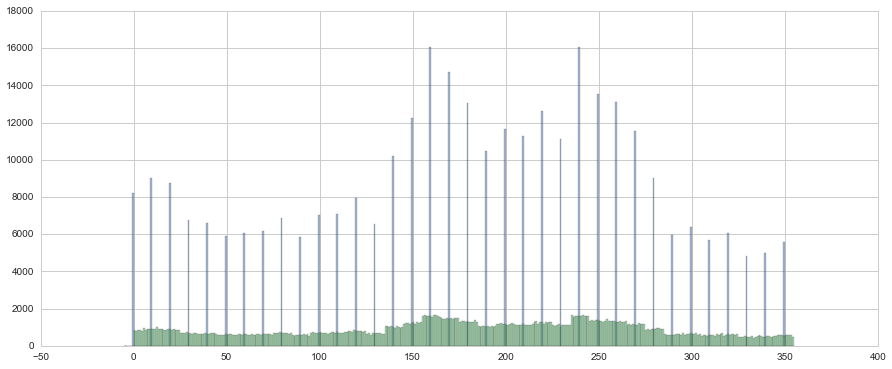

In [97]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df)
df['dir']=df['dir_ran']

-1.96194202455 -1.37164035822


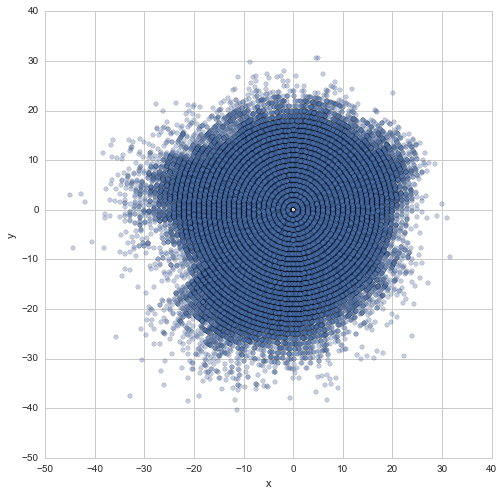

In [98]:
alpha = 0
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
df['x']=df.u
df['y']=df.v
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)
print np.mean(df.x), np.mean(df.y)

In [99]:
# Check if there is any missing dir 
if 'dir_ran' not in df.columns:
    print df['dir'].value_counts()

# Naive OEN Estimation (Single Gaussian)
Optional, only for demonstration purpose

In [100]:
run_single_OEN = False

In [101]:
import pylab 
import scipy.stats as stats
def cor_of_alpha(alpha):
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df['u'],df['v'])
    return cor[0]

# Try plot alpha - cor
def plot_cor():
    cors = []
    for alpha in np.arange(0,180,10):
        cor = cor_of_alpha(alpha)
        std_u = np.std(df.u)
        std_v = np.std(df.v)
        comb = [alpha, cor, std_u, std_v]
        cors.append(comb)
        print comb

    plt.scatter(zip(*cors)[0], zip(*cors)[1]) # plot rotation-correlation
    plt.title('Rotation angle - Correlation')
    pylab.show()
    
    pylab.plot(zip(*cors)[0], zip(*cors)[2]) # plot rotation-std_u
    pylab.plot(zip(*cors)[0], zip(*cors)[3]) # plot rotation-std_v
    plt.title('Rotation angle - std')
    pylab.show()
    
if run_single_OEN: plot_cor() 

In [102]:
def rotate_for_lowest_correlation(df):
    # Find the desired alpha for lowest correlation between u,v
    # alpha is the rotation angle for u-v panel
    alpha = sp.optimize.brentq(cor_of_alpha, 0, 90)
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df.u,df.v)
    print 'rotation angle and corresponding correlation: \n', alpha, cor
    return df  # return the dataset that has rorated u,v value

if run_single_OEN: df = rotate_for_lowest_correlation(df)

In [103]:
# Compare u,v with normal distrubution
## P-P plot, vs Q-Q plot, should be q-q
def plot_against_normal_distribution(df):
    mean,std = np.mean(df.u),np.std(df.u)
    df['u_norm']=df['u'].apply(lambda x: (x-mean)/std)
    print 'u mean and std:', mean, std

    mean,std = np.mean(df.v),np.std(df.v)
    df['v_norm']=df['v'].apply(lambda x: (x-mean)/std)
    print 'v mean and std:', mean, std

    stats.probplot(df.u_norm, dist="norm", plot=pylab)
    stats.probplot(df.v_norm, dist="norm", plot=pylab)

    pylab.show()
    
if run_single_OEN: plot_against_normal_distribution(df)

In [104]:
from scipy import integrate
from math import *

def calculate_the_probability_distribution_of_windspeed(df):
    u,v = np.mean(df.u), np.mean(df.v)
    sigu, sigv = np.std(df.u), np.std(df.v)
    U = sqrt((u)**2 + (v)**2) # the R value of the centre of the ellipse, in polar coords
    phi = atan(u/v) # the angle of the centre of the elliplse, in polar coords

    def f(V,theta):
        return exp(-1/2* (( (V*cos(theta)-U*cos(phi)) /sigu)**2 + ((V*sin(theta)-U*sin(phi)) /sigv)**2))/(2*np.pi*sigu*sigv)*V

    # x is the speed, y is the probalility
    x_vals = np.linspace(0,50.)
    y_vals =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals]
    return x_vals,y_vals

In [105]:
def plot_comparison(df):
    sample = df.speed
    ecdf = sm.distributions.ECDF(sample)

    # Empirical distribution, plot points
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

    # Weibull distribution
    x = np.linspace(min(sample), max(sample))
    w_scale = weibull_params[1] # The Weibull need previous code fitting 
    c_shape = weibull_params[3]
    qz=np.exp(-(x/c_shape)**w_scale)
    plt.plot(np.log(x), np.log(-np.log(qz)),'-')

    # OEN distribution
    x, y_ = x_vals, y_vals
    y = np.array(zip(*y_)[0])
    plt.plot(np.log(x), np.log(-np.log(1-y)),'-')

    plt.show()
    
if run_single_OEN:
    x_vals,y_vals = calculate_the_probability_distribution_of_windspeed(df)
    plot_comparison(df)

### Single OEN Fitting

In [106]:
def run_single_OEN_fitting(df):
    plot_cor()
    df = rotate_for_lowest_correlation(df)
    plot_against_normal_distribution(df)
    x_vals,y_vals = calculate_the_probability_distribution_of_windspeed(df)
    plot_comparison(df)

# 0. Create Input, speed_set

In [107]:
# speed_set = np.array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
speed_set = np.array(zip(df.x, df.y))
speed_angle_set = np.array(zip(df.speed, df.dir))

# 1. Kernel Density Estimation

In [108]:
sample = speed_set
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1).fit(sample) # need to consider the bandwidth for different sites

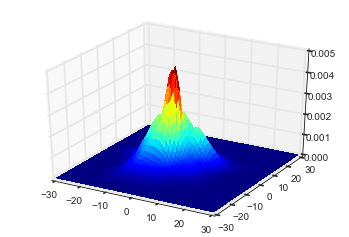

<matplotlib.contour.QuadContourSet instance at 0x11ddd5a28>

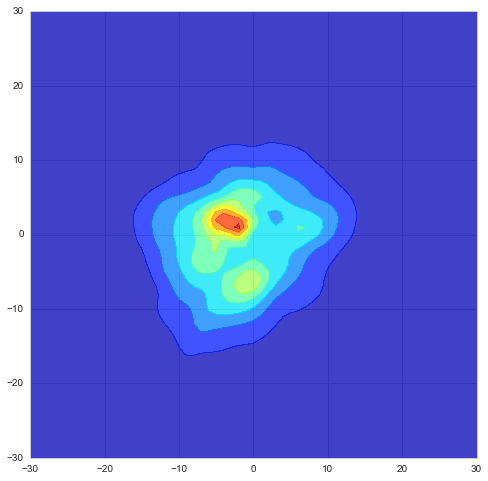

In [109]:
# Plot jPDF
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

def plot_3d_prob_density(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(
        X, Y, Z,rstride=1, cstride=1, cmap='jet',
                       linewidth=0, antialiased=False)
    return plt.show()

def plot_2d_prob_density(X,Y,Z):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    ax.set_aspect('equal')
    # For docs, see `help(plt.contour)`
    return plt.contourf(X, Y, Z, 10, alpha=.75, cmap='jet')  

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(kde.score_samples(coords)).reshape(len(X),len(Y))

plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [110]:
# Can get the result, but speed is very slow
def f(x,y):
    # exp to turn log probabilty into normal
    return exp(kde.score_samples([x,y]))

# Check for the corretness of the method, should ~1
# integrate.nquad(f, [[-50, 50],[-50, 50]])

# Query for the prob of a certain point
exp(kde.score_samples([0,0]))

0.0017406747967406019

# 2. GMM Estimation, using EM algo

In [111]:
from sklearn import mixture
import matplotlib as mpl
from matplotlib.patches import Ellipse

In [112]:
sample= speed_set

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=3, covariance_type='full')
clf.fit(sample)

print clf.converged_

for i in [0,1,2]:
    print clf.weights_[i], clf.means_[i], clf.covars_[i]

True
0.318635758255 [ 3.56021118  1.45746731] [[ 43.17605104   3.30119103]
 [  3.30119103  37.04613808]]
0.317792632167 [-3.15083921 -7.42636603] [[ 39.48041205   7.3058149 ]
 [  7.3058149   47.65170755]]
0.363571609578 [-5.76238373  1.44126449] [[ 43.86885678   2.15123814]
 [  2.15123814  31.45925334]]


In [113]:
from numpy import inf
# Check pdf
def f(x,y):
    # exp to turn log probabilty into normal
    return exp(clf.score([[x,y]]))
# integrate.nquad(f, [[-50, 50],[-50, 50]])

-66.4374236924 [ 3.56021118  1.45746731] [ 35.60645024  44.61573888]
149.607665407 [-3.15083921 -7.42636603] [ 35.19542966  51.93668993]
-80.4391467862 [-5.76238373  1.44126449] [ 31.09691033  44.23119979]


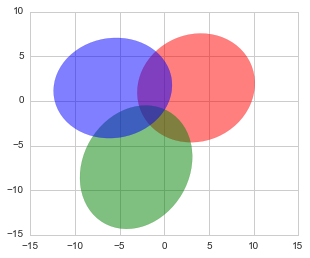

In [114]:
# how to write the for loop?
fig, ax = plt.subplots()
for i, color in enumerate('rgb'):
    # eigenvalues, and eigen vector
    v, w = np.linalg.eigh(clf._get_covars()[i][:2, :2])

    u1 = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u1[1], u1[0])
    angle = 180 * angle / np.pi
    # angle, mean, eigenvalues, 
    print angle, clf.means_[i], v
    # half width stands for std value
    ell = mpl.patches.Ellipse(xy=clf.means_[i], width=2*sqrt(v[0]), height=2*sqrt(v[1]), angle = angle, color=color)
    ell.set_alpha(0.5)
    ax.add_patch(ell)
    
# plt.scatter(sample[:, 0], sample[:, 1],  marker='+', alpha=0.5, color = 'y')
ax.set_aspect('equal')
ax.autoscale()
plt.draw() 

In [115]:
from sklearn import mixture
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib.patches import Ellipse

(-50, 50)

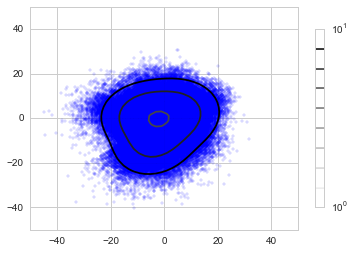

In [116]:
sample= speed_set
# plot sample point
plt.scatter(sample[:, 0], sample[:, 1], marker='+', alpha=0.5)

x = y = np.linspace(-50, 50)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                 levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlim((-50,50))
plt.ylim((-50, 50))

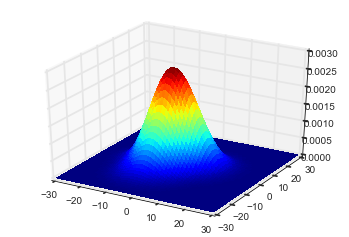

<matplotlib.contour.QuadContourSet instance at 0x1115cf998>

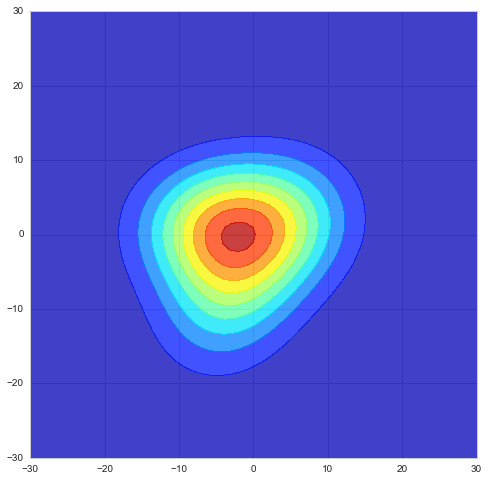

In [117]:
X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(clf.score_samples(coords)[0]).reshape(XX.shape)
    
plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

## GMM, EM VS. KDE

In [118]:
panel_array = []
for i in np.arange(-30, 31, 1):
    for j in np.arange(-30, 31, 1):
        panel_array.append([i,j])

points = panel_array
gmm_pdf_result = np.exp(clf.score_samples(points)[0])

In [119]:
kde_result = np.exp(kde.score_samples(points))
kde_result

array([  4.15770521e-07,   1.87778010e-07,   8.89923750e-08, ...,
         3.19037177e-32,   2.15587625e-34,   5.35934703e-37])

In [120]:
test_point = [0,0]
print exp(kde.score_samples(test_point))
print exp(clf.score_samples(test_point)[0])

0.00174067479674
0.00272616951405


### RMSE & R Square

In [121]:
error_array = np.power(gmm_pdf_result - kde_result,2)
rmse = np.sqrt(np.average(error_array))
print rmse

0.000144154688453


In [122]:
# R square measure:
# https://en.wikipedia.org/wiki/Coefficient_of_determination
y_mean = np.mean(kde_result)
SS_tot = np.power(kde_result - y_mean,2)
SS_tot_avg = np.average(SS_tot)
print SS_tot_avg

# The original value is result.fun is log of rmse
SS_res_avg = np.average(error_array)
print SS_res_avg

R_square = 1 - SS_res_avg/SS_tot_avg 
print R_square

3.32627760433e-07
2.07805742029e-08
0.937526037587


In [123]:
# This calculation speed is very slow
def f(V,theta):
    return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

x_vals_OEN3_EM = np.linspace(0,50)
y_vals_OEN3_EM =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3_EM]

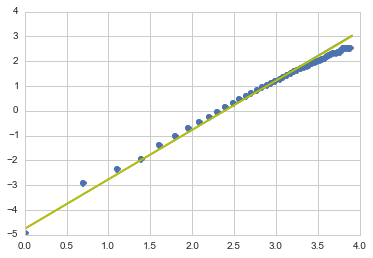

In [124]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Plot points, with empirical distribution
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# Weibull distribution
x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')

# OEN3 distribution
x, y_ = x_vals_OEN3_EM, y_vals_OEN3_EM
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'y')

plt.show()

In [125]:
# # Calculate angle distribution
# def f(V,theta):
#     return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V

# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

# x_vals = np.linspace(0,2*np.pi, num=36)
# y_vals =[integrate.nquad(f, [[0, inf],[x_val, x_val+np.pi/18]]) for x_val in x_vals]

In [126]:
# x, y_ = x_vals, y_vals
# y = np.array(zip(*y_)[0])*len(sample)
# bins=np.arange(min(df.dir), max(df.dir) + 1, 1)
# df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
# plt.plot(x/np.pi*180, y,'-', color='black')
# plt.show()

# 3. Least Square Prob Estimation

In [127]:
from sklearn.neighbors import KernelDensity
if not kde:
    sample = speed_set
    kde = KernelDensity(bandwidth=1.0).fit(sample) 

In [128]:
panel_array = []
for i in np.arange(-30, 31, 1):
    for j in np.arange(-30, 31, 1):
        panel_array.append([i,j])

sample = panel_array

In [129]:
# very slow if the dataset is too large, e.g. 100,000
if not kde_result.all():
    kde_result = np.exp(kde.score_samples(sample))
kde_result

array([  4.15770521e-07,   1.87778010e-07,   8.89923750e-08, ...,
         3.19037177e-32,   2.15587625e-34,   5.35934703e-37])

In [130]:
print len(kde_result)

3721


In [131]:
gmm_em_result = []
gmm_em_result.extend(clf.weights_[0:3])
for i in [0,1,2]:
    meanx,meany=clf.means_[i].tolist()
    sigx,sigy = np.sqrt(clf.covars_ [i][0,0]), np.sqrt(clf.covars_ [i][1,1])
    rho = clf.covars_ [i][0,1]/(sigx*sigy)
    gmm_em_result.extend([meanx,meany, sigx,sigy,rho])
    print meanx,meany, sigx,sigy,rho
    
print gmm_em_result

3.56021117923 1.45746730689 6.57084857828 6.08655387534 0.0825425205278
-3.15083921313 -7.42636603074 6.2833440179 6.90302162446 0.168437424545
-5.76238372557 1.44126448781 6.62335691203 5.60885490458 0.0579076744846
[0.3186357582549208, 0.31779263216733117, 0.3635716095777487, 3.560211179227435, 1.4574673068914357, 6.570848578275795, 6.0865538753429362, 0.082542520527794941, -3.150839213129853, -7.426366030736064, 6.2833440178951019, 6.9030216244595479, 0.16843742454463723, -5.762383725571704, 1.4412644878091787, 6.623356912032464, 5.608854904578191, 0.057907674484579445]


In [132]:
points = sample

from scipy.stats import multivariate_normal

def create_gaussian_2d(meanx,meany,sigx,sigy,rho):
    sigxy = rho*sigx*sigy
    return multivariate_normal(mean=[meanx,meany], cov=[[sigx**2,sigxy],[sigxy,sigy**2]], allow_singular=True)

def square_error(x0, log_mode = False):
    f1,f2,f3,\
    u1,v1,sigu1,sigv1,rho1, \
    u2,v2,sigu2,sigv2,rho2, \
    u3,v3,sigu3,sigv3,rho3 = x0
    # 1. Generate Mixed Gaussian Model  
    g1 = create_gaussian_2d(u1,v1,sigu1,sigv1,rho1)   
    g2 = create_gaussian_2d(u2,v2,sigu2,sigv2,rho2)
    g3 = create_gaussian_2d(u3,v3,sigu3,sigv3,rho3) 
    def mixed_model(points):
        return f1*g1.pdf(points)+f2*g2.pdf(points)+f3*g3.pdf(points)
    # 2. Calculate the sum of square error
    # kde returns log prob, so need to convert it
    if log_mode:
        error_array = np.power(np.log(mixed_model(points)) - np.log(kde_result),2)
        mse = np.average(error_array)
        rmse = np.sqrt(mse)
        result = rmse
    else:
#         error_array = np.power(mixed_model(points) - cook_kde,2)
        error_array = np.power(mixed_model(points) - kde_result,2)
        mse = np.average(error_array)
        rmse = np.sqrt(mse)
        result = np.log(rmse)
    return result
    # The returned number seems too small, how to deal with it?   

cons = [{'type': 'eq', 'fun': lambda x: -x[0] - x[1] - x[2]+ 1}]
bonds = [(0., 0.99),(0., 0.99),(0., 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),]

# from GMM,EM 
x0 = gmm_em_result

result = sp.optimize.minimize(
    square_error,
    x0,
    method = 'SLSQP', 
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

  status: 0
 success: True
    njev: 85
    nfev: 1704
     fun: -9.243149885943069
       x: array([ 0.69422194,  0.26085666,  0.0449214 , -1.59004534,  1.75680229,
        8.93831866,  5.82083164,  0.12452873, -2.87875157, -8.4085991 ,
        5.84905035,  4.59481514,  0.17257789, -3.68162392,  1.89366414,
        1.95698461,  1.44426709, -0.06697401])
 message: 'Optimization terminated successfully.'
     jac: array([  1.22734308e-01,   1.22735023e-01,   1.22736454e-01,
         0.00000000e+00,  -1.19209290e-07,   2.38418579e-07,
        -1.19209290e-07,  -2.38418579e-07,   0.00000000e+00,
        -1.19209290e-07,   1.19209290e-07,   0.00000000e+00,
        -1.19209290e-07,  -1.19209290e-07,   0.00000000e+00,
        -1.19209290e-07,   0.00000000e+00,  -1.19209290e-07,
         0.00000000e+00])
     nit: 85

## LRMSE VS. KDE

In [133]:
# Least Root Mean Square Error result
exp(result.fun)

9.677228797257812e-05

In [134]:
# RMSE / Mode
print exp(result.fun)/np.max(kde_result)
print exp(result.fun)/np.mean(kde_result)

0.0206262867447
0.360403880375


In [135]:
# R square measure:
# https://en.wikipedia.org/wiki/Coefficient_of_determination

y_mean = np.mean(kde_result)
SS_tot = np.power(kde_result - y_mean,2)
SS_tot_avg = np.average(SS_tot)
print SS_tot_avg

# The original value is result.fun is log of rmse
SS_res_avg = np.square(exp(result.fun))
print SS_res_avg

R_square = 1 - SS_res_avg/SS_tot_avg 
print R_square

3.32627760433e-07
9.36487571945e-09
0.971845778274


In [136]:
# np.mean(cook_kde)/np.mean(kde_result)

In [137]:
f1,f2, f3,\
u1,v1,sigu1,sigv1,rho1, \
u2,v2,sigu2,sigv2,rho2, \
u3,v3,sigu3,sigv3,rho3 = result.x

g1 = f1,u1,v1,sigu1,sigv1,rho1
g2 = f2,u2,v2,sigu2,sigv2,rho2
g3 = f3,u3,v3,sigu3,sigv3,rho3
gmm = [g1,g2,g3]

0.694221941375 [[ 1.95784176]
 [ 1.33471124]] [ 5.74344422  8.98824065] 97.8643284215 
0.260856657152 [[-7.13973075]
 [ 5.29301373]] [ 4.4312963   5.97388728] 107.652203817 
0.0449214014724 [[ 1.49007686]
 [ 3.86264023]] [ 1.43721821  1.96216717] 83.8756580692 


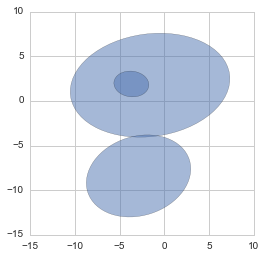

In [138]:
fig, ax = plt.subplots()

for g in gmm:
    xy_mean = np.matrix([g[1],g[2]])
    sigx, sigy, sigxy = g[3],g[4],g[5]*g[3]*g[4]
    cov_matrix = np.matrix([[sigx**2, sigxy], [sigxy, sigy**2]])

    # eigenvalues, and eigen vector
    w, v = np.linalg.eigh(cov_matrix)

    uu = v[0] / np.linalg.norm(v[0])
    angle_arc = -(np.arctan2(uu[0,1], uu[0,0])+np.pi)
    # rorate angle, counter clock wise
    angle = - 180 * angle_arc / np.pi
    
    transform_matrix = np.matrix([[np.cos(angle_arc ), -np.sin(angle_arc )], [np.sin(angle_arc ), np.cos(angle_arc )]])
    xy_mean_in_uv = transform_matrix * xy_mean.T
    
    # print fraction, rotation agnle, u v mean(in standalone panel), std
    print g[0], xy_mean_in_uv, np.sqrt(w), angle, 
    print ''

    ell = mpl.patches.Ellipse(xy=xy_mean.T, width=2*sqrt(w[0]), height=2*sqrt(w[1]), angle = angle)
    ell.set_alpha(0.5)
    ax.add_patch(ell)


ax.autoscale()
ax.set_aspect('equal')
plt.draw() 

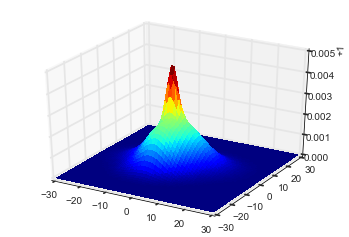

<matplotlib.contour.QuadContourSet instance at 0x11d8c0128>

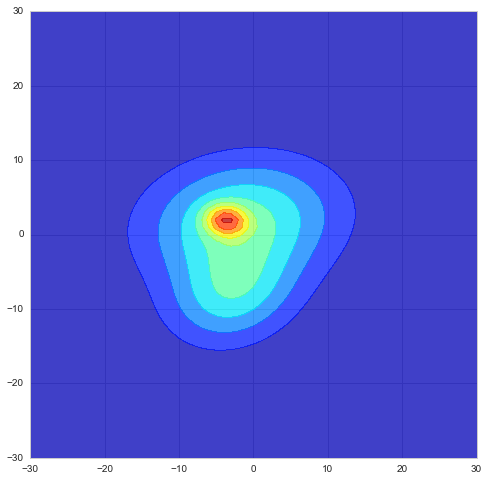

In [139]:
# Plot probability density 
g1 = create_gaussian_2d(u1,v1,sigu1,sigv1,rho1)   
g2 = create_gaussian_2d(u2,v2,sigu2,sigv2,rho2)
g3 = create_gaussian_2d(u3,v3,sigu3,sigv3,rho3) 
def mixed_model_pdf(points):
    return f1*g1.pdf(points)+f2*g2.pdf(points)+f3*g3.pdf(points)

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(mixed_model_pdf(coords)).reshape(XX.shape)
    
plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [140]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = np.linspace(0,50)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3_LMSE ]

In [141]:
def f(V,theta):
    return np.exp(kde.score_samples([[V*cos(theta),V*sin(theta)]]))*V
# integrate.nquad(f, [[0, 50],[0, 2*np.pi]])

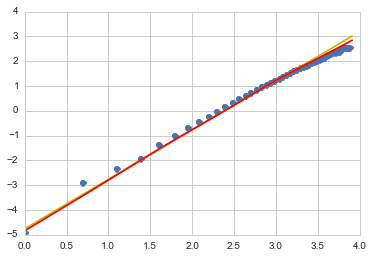

In [142]:
# Plot v-p
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Plot points, with empirical distribution
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# OEN3 distribution, EM
x, y_ = x_vals_OEN3_EM, y_vals_OEN3_EM
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'y')

# OEN3 distribution, LMSE
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'r')

plt.show()

In [143]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

# Check, should ~1
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

In [144]:
# Calculate Angle Distribution
x_vals = np.linspace(0,2*np.pi, num=36)
y_vals =[integrate.nquad(f, [[0, inf],[x_val, x_val+np.pi/18]]) for x_val in x_vals]

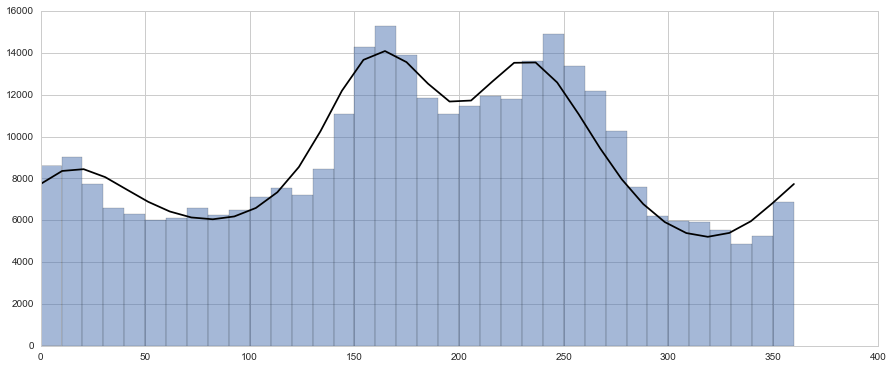

In [145]:
x, y_ = x_vals, y_vals
# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = np.array(zip(*y_)[0])*len(df['dir']) 

bins=np.arange(0, 360 + 1, 10)
df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

plt.plot(x/np.pi*180, y,'-', color='black')
plt.show()

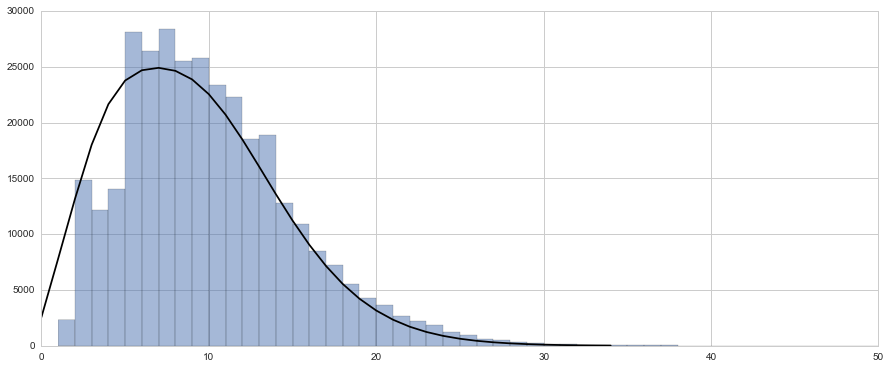

In [146]:
# Calculate Speed Distribution
x_vals = np.arange(0, 35, 1)
y_vals =[integrate.nquad(f, [[x_val, x_val+1],[0, 2*np.pi]]) for x_val in x_vals]

x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])*len(df.speed)

bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

plt.plot(x, y,'-', color='black')
plt.show()

In [147]:
# df['speed'].value_counts().sort_index()
# how to get the value out?

In [148]:
fff

NameError: name 'fff' is not defined

# KDE From Cook, Ciampino

In [ ]:
# points
# kde results should from [-30, -30], [-30, -29],[-30, -28] to [30,30]
kde_file = 'cook_kde.csv'
temp_matrix = np.loadtxt(open(kde_file,"rb"),delimiter=",",skiprows=1)
temp_matrix2 = temp_matrix.reshape(-1)
cook_kde = temp_matrix2
cook_kde

In [ ]:
error_array = np.power(kde_result - cook_kde,2)
mse = np.average(error_array)
rmse = np.sqrt(mse)
rmse

## OEN3 from Cook

In [ ]:
from scipy.stats import multivariate_normal, norm   

def create_rotate_norm_dist(meanx,meany,sigx,sigy,angle):
    # angle degree, from u,v to x,y, counter-clockwise
    alpha = angle
    alpha_arc = alpha * pi / 180.0
    transform_matrix = np.matrix([[np.cos(alpha_arc), -np.sin(alpha_arc)], [np.sin(alpha_arc), np.cos(alpha_arc)]])
    cov_matrix = np.matrix([[sigx**2, 0], [0, sigy**2]])
    # cov_matrix
    cov_trans = transform_matrix * cov_matrix * transform_matrix.T
    # need to converte by .tolist()[0]
    norm_mean = np.matrix.dot(transform_matrix,np.array([meanx,meany])).tolist()[0]
    norm_rotate = multivariate_normal(mean=norm_mean, cov=cov_trans, allow_singular=True)
    
    return norm_rotate

# need to change the direction of x,y of Cook, to comply with the standard in this program
g1 = create_rotate_norm_dist(0.0565402,3.5586487,5.809,9.237,10.511)
g2 = create_rotate_norm_dist(4.315,-0.407,3.002,4.173,75.193)
g3 = create_rotate_norm_dist(-0.491,-2.777,1.979,2.571,-25.358)

In [ ]:
# format to mean, std, rho
for g in [g1,g2,g3]:
    sigx,sigy = np.sqrt(g.cov[0,0]), np.sqrt(g.cov[1,1])
    rho = g.cov[0,1]/(sigx*sigy)
    print g.mean, sigx,sigy,rho

In [ ]:
# plot Cook's ellipses results.
# Input from Cook's LMSE result, 
# mean_u, mean_v, std_u, std_v, rotation_angle
gc1 = [0.0565402,3.5586487,5.809,9.237,10.511]
gc2 = [4.315,-0.407,3.002,4.173,75.193]
gc3 = [-0.491,-2.777,1.979,2.571,-25.358]

fig, ax = plt.subplots()
for g in [gc1,gc2,gc3]:
    xy_mean_in_uv = np.matrix([g[0],g[1]])
    std_x, std_y = g[2],g[3]
    
    angle = g[4]
    angle_arc = angle * pi / 180.0
    transform_matrix = np.matrix([[np.cos(angle_arc), -np.sin(angle_arc)], [np.sin(angle_arc), np.cos(angle_arc)]])
    xy_mean = transform_matrix * xy_mean_in_uv.T
    
    print xy_mean, g[2],g[3], angle
    
    ell = mpl.patches.Ellipse(xy=xy_mean, width=2*g[2], height=2*g[3], angle = angle)
    ell.set_alpha(0.5)
    ax.add_patch(ell)

ax.autoscale()
ax.set_aspect('equal')
plt.draw() 

In [ ]:
g=g3
# use np.matrix, not np.array
xy_mean = np.matrix([g.mean[0],g.mean[1]])
cov_matrix = g.cov

# eigenvalues, and eigen vector
w, v = np.linalg.eigh(cov_matrix)

uu = v[0] / np.linalg.norm(v[0])
angle_arc = -(np.arctan2(uu[1], uu[0])+np.pi)
# # rorate angle, counter clock wise
angle = - 180 * angle_arc / np.pi

transform_matrix = np.matrix([[np.cos(angle_arc ), -np.sin(angle_arc )], [np.sin(angle_arc ), np.cos(angle_arc )]])
xy_mean_in_uv = transform_matrix * xy_mean.T

# # print fraction, rotation agnle, u v mean(in standalone panel), std
print xy_mean_in_uv, np.sqrt(w),angle

In [ ]:
f1, f2 = 0.415, 0.298
def mixed_model_pdf(points):
    return f1*g1.pdf(points)+f2*g2.pdf(points)+(1-f1-f2)*g3.pdf(points)

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T 
Z = mixed_model_pdf(coords).reshape(XX.shape)

plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [ ]:
# points is [-30,30]
error_array = np.power(mixed_model_pdf(points) - cook_kde,2)
mse = np.average(error_array)
rmse = np.sqrt(mse)

In [ ]:
rmse